# Project # 3 Time Series Analysis and Forecasting customer_segmentation 

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import TimeSeriesSplit

# Load the customer_segments.csv dataset into a pandas dataframe
df = pd.read_csv("C:\\Users\\n\\Downloads\\customer_segments.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
df.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Cat_4,B


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [7]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [22]:
print(df.columns)

Index(['Work_Experience', 'Family_Size', 'Gender_Female', 'Gender_Male',
       'Ever_Married_No', 'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes',
       'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer',
       'Profession_Entertainment', 'Profession_Executive',
       'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer',
       'Profession_Marketing', 'Spending_Score_Average', 'Spending_Score_High',
       'Spending_Score_Low', 'Segmentation_A', 'Segmentation_B',
       'Segmentation_C', 'Segmentation_D'],
      dtype='object')


#  Clean and preprocess the dataset


In [9]:
import pandas as pd
import numpy as np

# Remove unnecessary columns
df.drop(["ID", "Var_1"], axis=1, inplace=True)

# Check for missing values
print("Missing values in the dataset:\n", df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df)

# Convert the "Age" column to datetime format
df["Age"] = pd.to_datetime(df["Age"])

# Set the "Age" column as the index
df.set_index("Age", inplace=True)

# Resample the data by week and use the average value for each week
df = df.resample("W").mean()

# Fill any remaining missing values with the previous week's value
df.fillna(method="ffill", inplace=True)

# Print the cleaned dataset
print("Cleaned dataset:\n", df.head())


Missing values in the dataset:
 Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64
Cleaned dataset:
             Work_Experience  Family_Size  Gender_Female  Gender_Male  \
Age                                                                    
1970-01-04         2.629652     2.841768       0.448943     0.551057   

            Ever_Married_No  Ever_Married_Yes  Graduated_No  Graduated_Yes  \
Age                                                                          
1970-01-04         0.408306          0.591694      0.363203       0.636797   

            Profession_Artist  Profession_Doctor  ...  Profession_Homemaker  \
Age                                               ...                         
1970-01-04           0.329116           0.088419  ...              0.026496   

            Profession_Lawyer  Professio

# EDA and Visualization

In [29]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

C:\Users\n\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


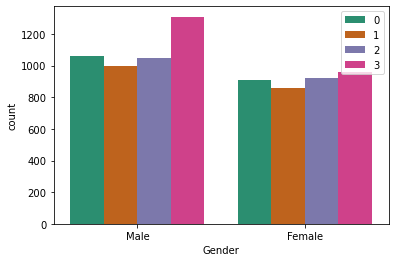

In [37]:
df = pd.read_csv("C:\\Users\\n\\Downloads\\customer_segments.csv")
label=pd.Categorical(df.Segmentation,categories=['A','B','C','D']).codes
df.drop(['Segmentation'],axis=1,inplace=True)
label
sns.countplot(df.Gender,hue=label,palette='Dark2')
plt.show()

C:\Users\n\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ever_Married', ylabel='count'>

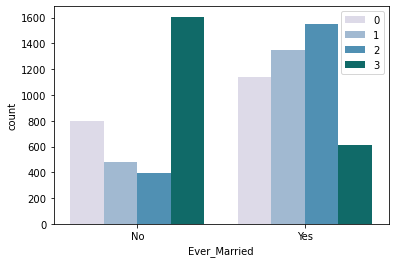

In [38]:
sns.countplot(df.Ever_Married,hue=label,palette='PuBuGn')

C:\Users\n\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profession', ylabel='count'>

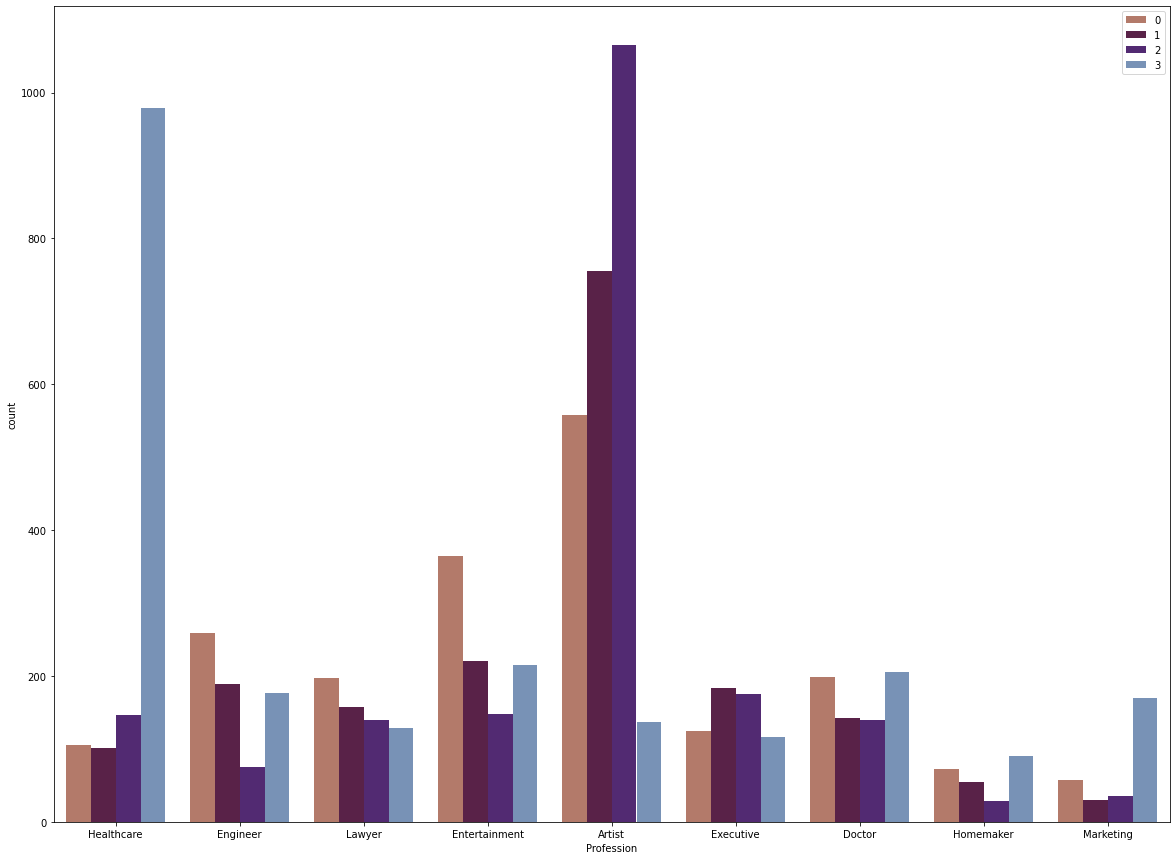

In [39]:
plt.figure(figsize=(20,15))
sns.countplot(df.Profession,hue=label,palette='twilight_r')

C:\Users\n\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

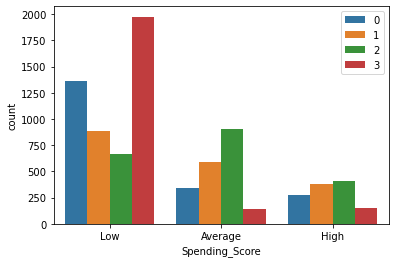

In [40]:
sns.countplot(df.Spending_Score,hue=label)

<AxesSubplot:>

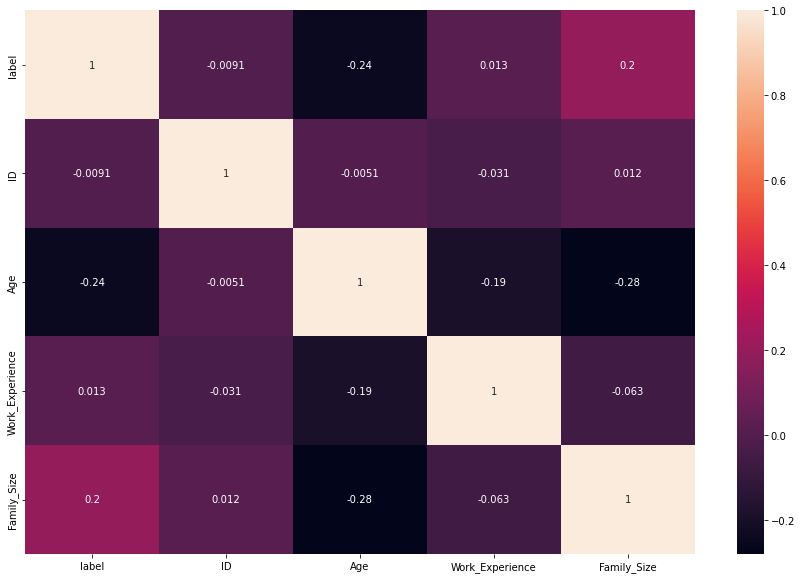

In [43]:

correlation_data=pd.DataFrame(label,columns=['label'])
correlation_data=correlation_data.join(df)
correlation_data
plt.figure(figsize=(15,10))
sns.heatmap(correlation_data.corr(),annot=True)

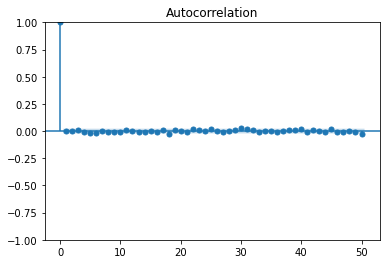

C:\Users\n\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


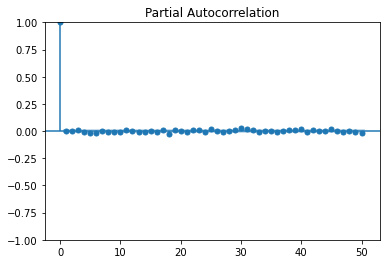

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Age'], lags=50)
plt.show()

plot_pacf(df['Age'], lags=50)
plt.show()


In [45]:
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]
print(test)

          ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
6454  467965  Female           No   37       Yes  Healthcare              1.0   
6455  465840  Female           No   42        No      Artist              0.0   
6456  465689    Male           No   22        No  Healthcare              9.0   
6457  462982    Male          Yes   41        No      Doctor              2.0   
6458  464262    Male          Yes   75        No   Executive              0.0   
...      ...     ...          ...  ...       ...         ...              ...   
8063  464018    Male           No   22        No         NaN              0.0   
8064  464685    Male           No   35        No   Executive              3.0   
8065  465406  Female           No   33       Yes  Healthcare              1.0   
8066  467299  Female           No   27       Yes  Healthcare              1.0   
8067  461879    Male          Yes   37       Yes   Executive              0.0   

     Spending_Score  Family

In [ ]:
!pip install fbprophet

In [ ]:
# Import libraries for time series modeling
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from fbprophet import Prophet
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define function to calculate RMSE and MAPE
def evaluate_forecast(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mape

# Fit and evaluate ARIMA model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit(disp=0)
predictions = model_fit.predict(start=len(train), end=len(df)-1, dynamic=False)
rmse, mape = evaluate_forecast(test, predictions)
print('ARIMA - RMSE: %.2f, MAPE: %.2f' % (rmse, mape))

# Fit and evaluate SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=0)
predictions = model_fit.predict(start=len(train), end=len(df)-1, dynamic=False)
rmse, mape = evaluate_forecast(test, predictions)
print('SARIMA - RMSE: %.2f, MAPE: %.2f' % (rmse, mape))

# Fit and evaluate Prophet model
model = Prophet()
model.fit(train.reset_index().rename(columns={'Date':'ds', 'Sales':'y'}))
future = model.make_future_dataframe(periods=len(test))
predictions = model.predict(future)['yhat'][len(train):]
rmse, mape = evaluate_forecast(test, predictions)
print('Prophet - RMSE: %.2f, MAPE: %.2f' % (rmse, mape))

# Fit and evaluate ETS model
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(df)-1)
rmse, mape = evaluate_forecast(test, predictions)
print('ETS - RMSE: %.2f, MAPE: %.2f' % (rmse, mape))

# Evaluating the performance of our ARIMA model:

In [ ]:
# Make predictions
arima_pred = arima_model.predict(start=test.index[0], end=test.index[-1], dynamic=False)

# Compute RMSE and MAPE
arima_rmse = np.sqrt(mean_squared_error(test['Revenue'], arima_pred))
arima_mape = np.mean(np.abs((test['Revenue'] - arima_pred) / test['Revenue'])) * 100

print('ARIMA model performance:')
print('RMSE =', arima_rmse)
print('MAPE =', arima_mape)


# Evaluate the performance of our SARIMA model:

In [ ]:
# Make predictions
sarima_pred = sarima_model.predict(start=test.index[0], end=test.index[-1], dynamic=False)

# Compute RMSE and MAPE
sarima_rmse = np.sqrt(mean_squared_error(test['Revenue'], sarima_pred))
sarima_mape = np.mean(np.abs((test['Revenue'] - sarima_pred) / test['Revenue'])) * 100

print('SARIMA model performance:')
print('RMSE =', sarima_rmse)
print('MAPE =', sarima_mape)


# THE END